### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (X) y la edad(y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
lista_alumnos = [("Clara Piniella", 30, 1.66),("Daniel Walker", 34, 1.87), ("Leonardo Frazzetto", 31, 1.78),("Xinru Yang", 24, 1.60), ("Jorge Garcia", 28, 1.79), ("Jonathan Suárez", 27, 1.86),("Marina Serrano", 25, 1.54), ("Karina Inche", 30, 1.61), ("Mary Meza", 32, 1.52),("Borja Puig", 37, 1.82), ("Mauro Garcia-Oliva", 45, 1.77), ("José Carlos Batista", 28, 1.70),("Isabel Palomares",24,1.78),("Gina Garrido",57,1.63), ("Sonia Cobo", 29, 1.73), ("Miguel Barquero", 35, 1.85),("Nacho Astorga",47,1.78), ("Adrià Gallardo", 24, 1.70), ("Juan Bayon", 38, 1.64), ("Nacho Fontal", 35, 1.82)]

In [2]:
import numpy as np # linear algebra
import pandas as pd # data prçocessing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
sns.set_style('whitegrid')

In [3]:
x = [x[-1] for x in lista_alumnos]
x = np.array(x)
x = x.reshape(-1,1)
x

array([[1.66],
       [1.87],
       [1.78],
       [1.6 ],
       [1.79],
       [1.86],
       [1.54],
       [1.61],
       [1.52],
       [1.82],
       [1.77],
       [1.7 ],
       [1.78],
       [1.63],
       [1.73],
       [1.85],
       [1.78],
       [1.7 ],
       [1.64],
       [1.82]])

In [4]:
y = [y[1] for y in lista_alumnos]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= None)

In [6]:
x_test

array([[1.82],
       [1.73],
       [1.82],
       [1.6 ]])

In [7]:
y_test

[37, 29, 35, 24]

In [8]:
lm = LinearRegression(n_jobs= -1)
lm.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [9]:
lm.score(x_test, y_test) * 100

-20.164374642463166

In [10]:
predictions = lm.predict(x_test)

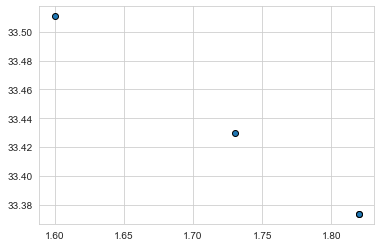

In [11]:
plt.scatter(x_test, predictions, edgecolors= 'black')

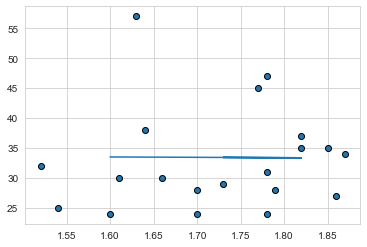

In [12]:
plt.scatter(x, y, edgecolors= 'black')
plt.plot(x_test, lm.predict(x_test))

In [13]:
df = pd.DataFrame({'age': [x[-1] for x in lista_alumnos], 'height': [y[1] for y in lista_alumnos]})
df

,age,height
0,1.66,30
1,1.87,34
2,1.78,31
3,1.60,24
4,1.79,28
5,1.86,27
6,1.54,25
7,1.61,30
8,1.52,32
9,1.82,37


<AxesSubplot:>

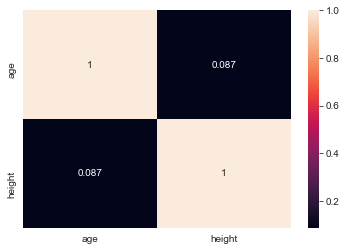

In [14]:
sns.heatmap(df.corr(), annot = True)
# Sale una correlación nula por lo que no tiene sentido aplicar un modelo de regresión lineal.

In [15]:
from sklearn import metrics

In [16]:
# Tiene utilidad usar el RMSE ya que da el error en la escala de los datos aplicados al modelo
print('MAE:', metrics.mean_absolute_error(x_test, predictions))
print('MSE:', metrics.mean_squared_error(x_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(x_test, predictions)))

MAE: 31.679418282548475
MSE: 1003.6069356371959
RMSE: 31.679755927677157


In [17]:
x2 = x * 2
x2

array([[3.32],
       [3.74],
       [3.56],
       [3.2 ],
       [3.58],
       [3.72],
       [3.08],
       [3.22],
       [3.04],
       [3.64],
       [3.54],
       [3.4 ],
       [3.56],
       [3.26],
       [3.46],
       [3.7 ],
       [3.56],
       [3.4 ],
       [3.28],
       [3.64]])

In [18]:
x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size= 0.2, random_state= 7)

In [19]:
lm2 = LinearRegression(n_jobs= -1)
lm2.fit(x2_train, y_train)

LinearRegression(n_jobs=-1)

In [20]:
prediction2 = lm2.predict(x2_test)

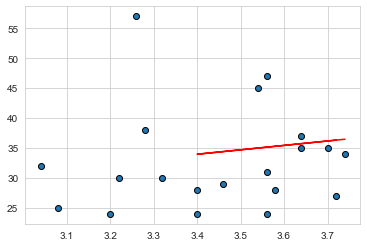

In [21]:
plt.scatter(x2, y, edgecolors='black')
plt.plot(x2_test, prediction2, color= 'red')

In [22]:
y2 = [z * 2 for z in y]
y2

[60,
 68,
 62,
 48,
 56,
 54,
 50,
 60,
 64,
 74,
 90,
 56,
 48,
 114,
 58,
 70,
 94,
 48,
 76,
 70]

In [23]:
x_train, x_test, y2_train, y2_test = train_test_split(x, y2, test_size= 0.2, random_state= 7)

In [24]:
lm3 = LinearRegression(n_jobs= -1)
lm3.fit(x_train, y2_train)

LinearRegression(n_jobs=-1)

In [25]:
prediction3 = lm3.predict(x_test)

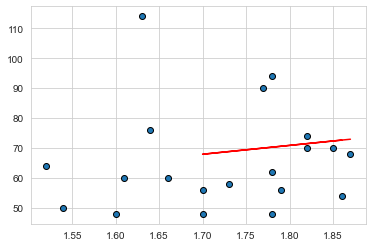

In [26]:
plt.scatter(x, y2, edgecolors='black')
plt.plot(x_test, prediction3, color= 'red')

In [ ]:
# como se puede apreciar en las gráficas no afecta a la pendiente mulltplicar x o y por 2